In [73]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield.without_axis(
    6,
    0,
    0.91,
    0.6,
    Rbegin=1,
    Rend=8,
    niter=800,
    guess=[6.0, 0.],
    tol=1e-9,
)

0 - dr : 0.0


In [ ]:
# set up the integrator for the Poincare
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["nPtrj"] = 10
pparams["nPpts"] = 150
pparams["zeta"] = 0

# Set RZs for the normal (R-only) computation
pparams["Rbegin"] = pyoproblem._R0+1e-3
pparams["Rend"] = 8.2

# Set up the Poincare plot object
pplot = PoincarePlot(pyoproblem, pparams, integrator_params=iparams)

# # R-only computation
pplot.compute()

In [ ]:
fig, ax = pplot.plot(marker=".", s=1)
# # plt.show()
# # fig.canvas.toolbar_visible = True
# fig.canvas.toolbar_visible = 'fade-in-fade-out'
# # fig.canvas.toolbar_position = 'top'
# fig.canvas.header_visible = False
# fig.canvas.footer_visible = True
# fig.canvas.resizable = False
# # fig.canvas.capture_scroll = True

# # fig.canvas.toolbar_visible = True
# display(fig.canvas)

In [ ]:
pplot.compute_iota()

In [ ]:
pplot.plot_iota()
plt.show()

#### Adding the perturbation

In [3]:
maxwellboltzmann = {"m": 3, "n": -2, "d": 0.9, "type": "maxwell-boltzmann", "amplitude": 0.05}
pyoproblem.add_perturbation(maxwellboltzmann)

0 - dr : 0.0


In [4]:
# set up the integrator for the Poincare
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["nPtrj"] = 15
pparams["nPpts"] = 150
pparams["zeta"] = 0

# Set RZs for the normal (R-only) computation
pparams["Rbegin"] = pyoproblem._R0+1e-3
pparams["Rend"] = 7.5

# Set up the Poincare plot object
pplot = PoincarePlot(pyoproblem, pparams, integrator_params=iparams)

# # R-only computation
pplot.compute()

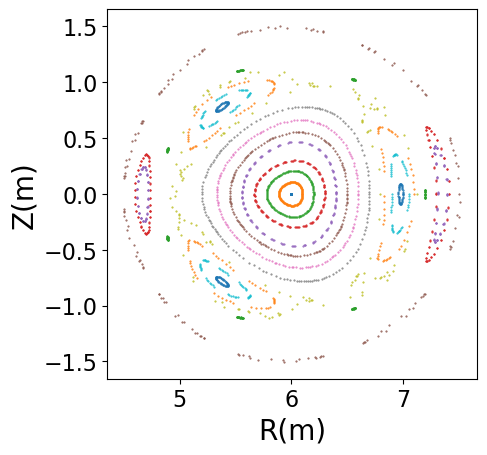

In [58]:
pplot.plot(marker=".", s=1)
fig = plt.gcf()
ax = fig.gca()

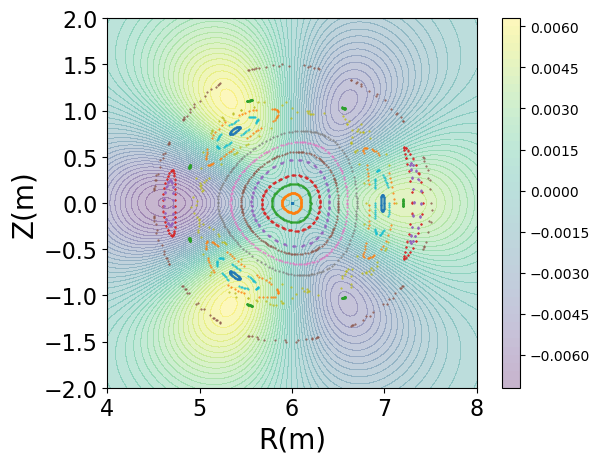

In [8]:
pyoproblem.plot_intensities([4, 8], [-2, 2], ax=ax, alpha=0.3)
fig

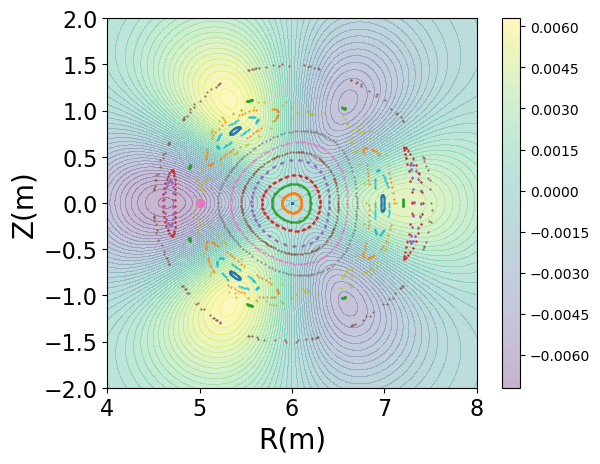

In [9]:
guess = [5, 0.]
ax.scatter(*guess)
fig

In [14]:
# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-13

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300
pparams['Z'] = 0

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
fixedpoint.compute(guess=guess, pp=2, qq=3, sbegin=2, send=10, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    raise ValueError("X-point not found")

[R,Z] : [4.986193214986655, 0.4643154947374634] - dtheta : -0.42948024478008406
R : 5.024804908361108


[R,Z] : [5.058761078681533, -0.09672266227006253] - dtheta : 0.10240157192912669
R : 5.020769684368847
[R,Z] : [5.02140815344229, -0.0021680693247807473] - dtheta : 0.0022154954438615704
R : 5.020678304618798
[R,Z] : [5.020678669223557, -1.2434645584929668e-06] - dtheta : 1.2697206095424463e-06
R : 5.020678252188105
[R,Z] : [5.020678252188727, -5.444915351926483e-13] - dtheta : 5.009326287108706e-13


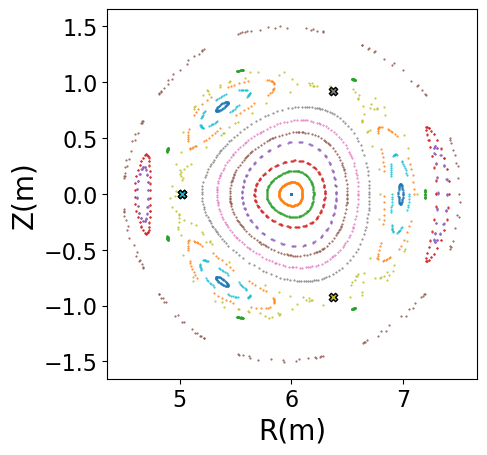

In [59]:
results
for rr in results:
    ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)
fig

In [49]:
# Set up the manifold
iparams = dict()
iparams["rtol"] = 1e-13
manifold = Manifold(fixedpoint, pyoproblem, integrator_params=iparams)

In [50]:
manifold.choose(0,1, directions=["u+", "s+"], sngs=[-1, 1])

In [57]:
manifold.compute(neps=100, nintersect=6)

2024-05-13 18:42:35 [info     ] Search for minimum of the linear error succeeded, epsilon = 1.33752e-07
2024-05-13 18:42:37 [info     ] Search for minimum of the linear error succeeded, epsilon = 1.22961e-07
2024-05-13 18:42:37 [info     ] Computing unstable manifold with postive epsilon...
2024-05-13 18:42:45 [info     ] Computing stable manifold with positive epsilon...


2024-05-13 18:43:01 [warning  ] Manifold u- not computed.
2024-05-13 18:43:01 [warning  ] Manifold s- not computed.


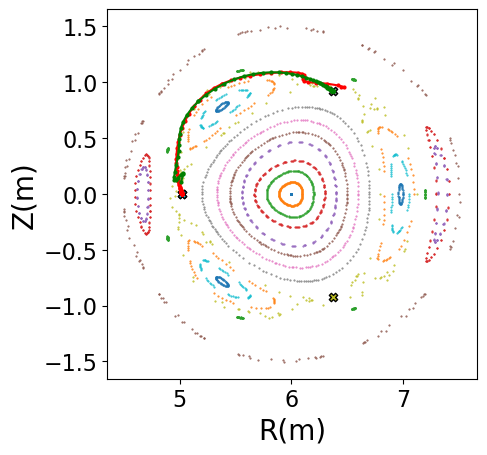

In [60]:
manifold.plot(ax=ax)
fig

In [63]:
manifold.vector_s, manifold.vector_u

(array([-0.813334  ,  0.58179705]), array([-0.31570366,  0.94885784]))

In [67]:
manifold.find_homoclinic(guess_eps_s = 8.977762596337492e-09, guess_eps_u = 0.0045205248068685795, n_s=5, n_u=4)

2024-05-13 18:50:40 [info     ] Search for minimum of the linear error succeeded, epsilon = 1.45974e-07
2024-05-13 18:50:41 [info     ] Search for minimum of the linear error succeeded, epsilon = 1.51344e-07
2024-05-13 18:50:41 [debug    ] Guess - 1.083441128057007e-06, 1.1233231772583624e-06
2024-05-13 18:50:41 [debug    ] Bounds - ((1.459735083003833e-07, 2.3128557644143973e-06), (1.5134447913989853e-07, 2.397990833656623e-06))
2024-05-13 18:50:41 [debug    ] n_s, n_u - 5, 4
2024-05-13 18:50:41 [debug    ] Inside : (1.0834411280570068e-06, 1.1233231772583626e-06)
2024-05-13 18:50:45 [debug    ] Returns - (array([5.54349351, 1.04455573]), array([5.00092012, 0.06728564]), array([0.5425734 , 0.97727009]))
2024-05-13 18:50:45 [debug    ] Inside : (3.257483887702918e-08, 0.9708057404419105)
2024-05-13 18:50:48 [debug    ] Returns - (array([6.34405578, 0.94049425]), array([5.25688145, 1.45075698]), array([ 1.08717432, -0.51026273]))
2024-05-13 18:50:48 [debug    ] Inside : (4.7482696467864

(8.977762596337492e-09, 0.0045205248068685795)

In [75]:
manifold.clinics

[(0.0045205248068685795,
  8.977762596337492e-09,
  0.0045205248068685795,
  array([6.36344293, 0.92730347]),
  array([6.36344293, 0.92730347]))]

In [70]:
marker = ["X", "o", "s", "p", "P", "*", "x", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(manifold.clinics):
    eps_s_i, eps_u_i = clinic[1:3]

    n_s, n_u = 5, 4
    
    hs_i = manifold.integrate(manifold.rfp_s + eps_s_i * manifold.vector_s, n_s, -1)
    hu_i = manifold.integrate(manifold.rfp_u + eps_u_i * manifold.vector_u, n_u, 1)
    # ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="purple", zorder=10)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10, label=f'$h_{i+1}$')

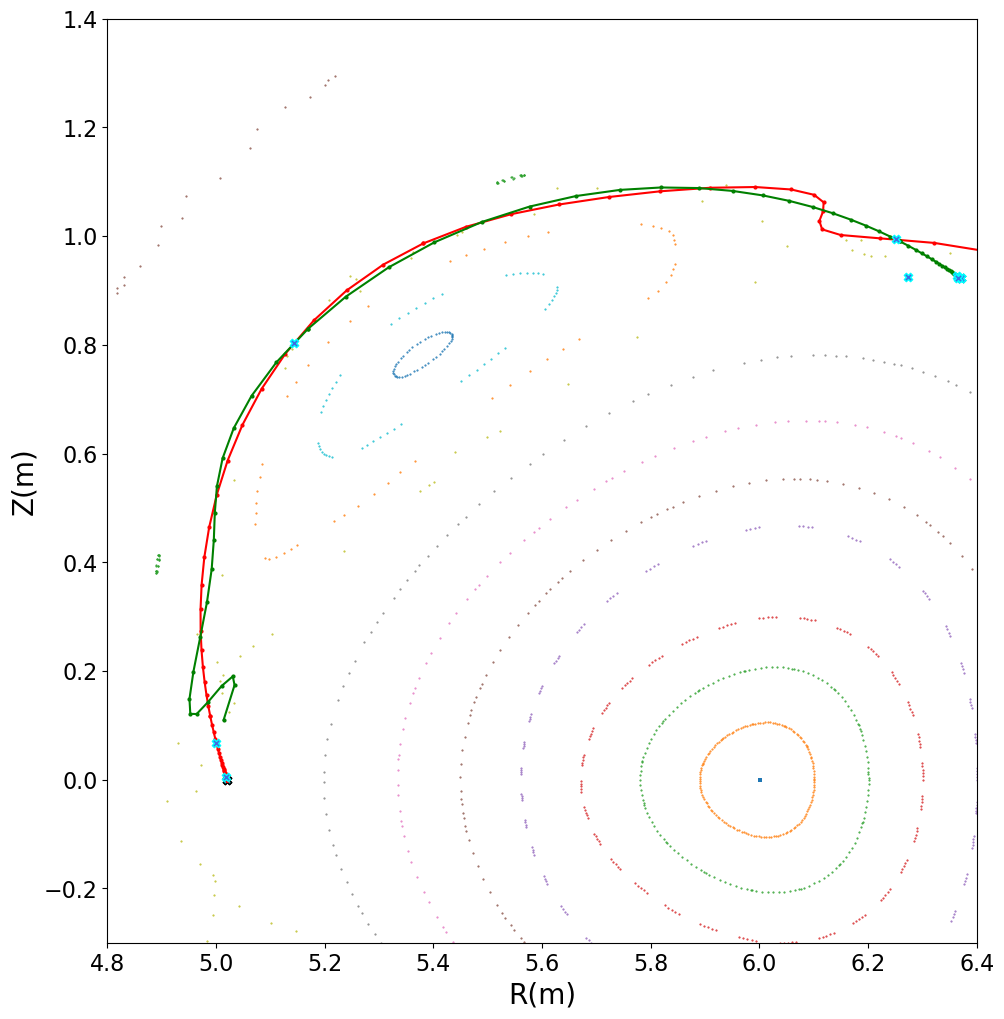

In [77]:
fig.set_size_inches(12, 12)
ax.set_xlim(4.8, 6.4)
ax.set_ylim(-0.3, 1.4)
fig